# Preprocessing and Scaling
### Different kinds of Preprocessing

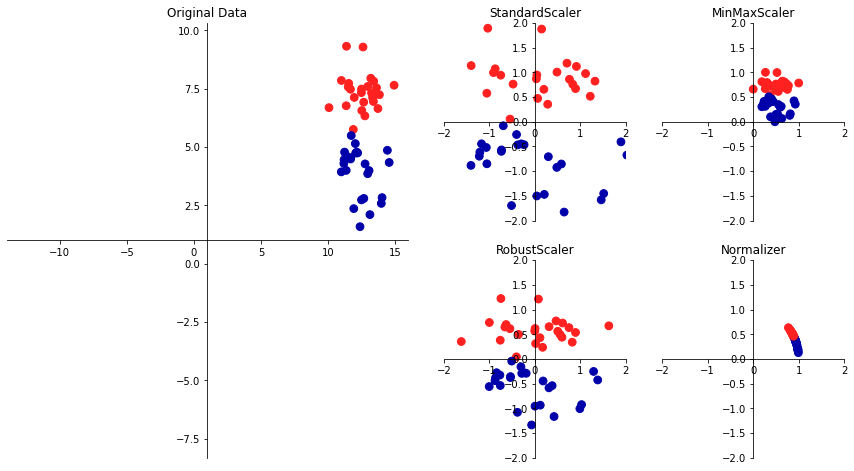

In [1]:
import mglearn

# StandardScaler ensures the mean is 0 and the variance is 1
# RobustScaler used median and quartiles instead of mean and variance
# MinMaxScaler shifts data such that all features are exactly between 0 and 1
# Normalizer scales each data point such that feature vector has Euclidean length of 1
mglearn.plots.plot_scaling()

### Applying Data Transformations

In [2]:
# importing the dataset and splitting the values into testing and training datasets

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
# Applying MinMaxScaler to the dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Checking the min and max before vs after values

print('Per-feature min value before:\n{}'.format(X_train.min(axis=0)))
print('Per-feature max value before:\n{}'.format(X_train.max(axis=0)))
print('Per-feature min value after:\n{}'.format(X_train_scaled.min(axis=0)))
print('Per-feature max value after:\n{}'.format(X_train_scaled.max(axis=0)))

Per-feature min value before:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
Per-feature max value before:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
Per-feature min value after:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Per-feature max value after:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


# Dimensionality Reduction, Feature Extraction and Manifold Learning
### Principal Component Analysis (PCA)

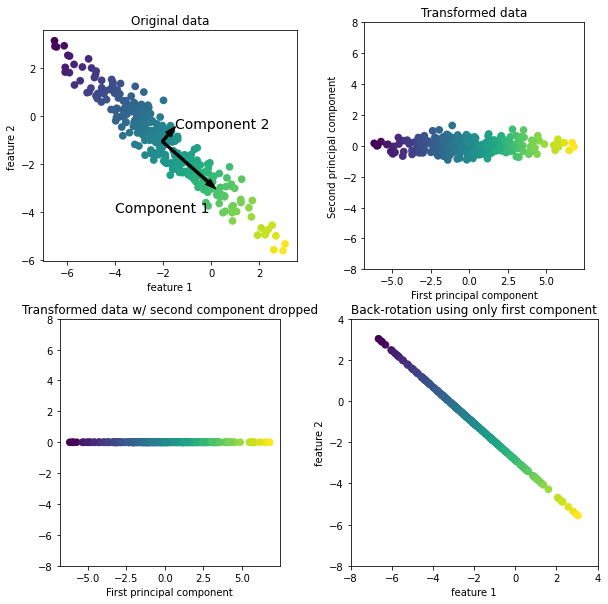

In [1]:
# Illustrate steps performed by PCA

import mglearn
mglearn.plots.plot_pca_illustration()

In [3]:
# Applying PCA

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [4]:
X_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Compinent')

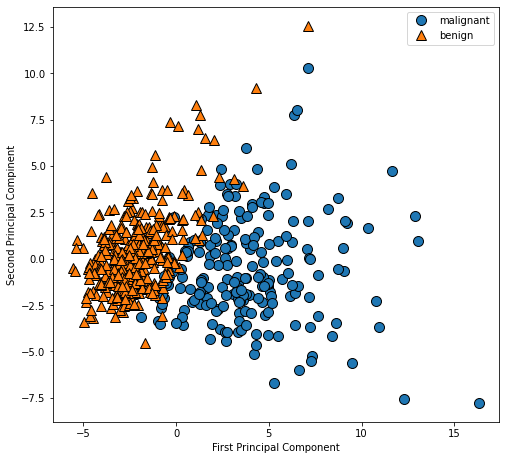

In [10]:
# Visualize the features after applying PCA

import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc = "best")
plt.gca().set_aspect('equal')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Compinent')

### Non-Negative Matrix Factorization (NMF)

In [1]:
# Importing datasets and mixing it
import mglearn
import numpy as np

S = mglearn.datasets.make_signals()
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
X.shape

(2000, 100)

In [2]:
# Using NMF on the dataset
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)

/home/sanket/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [3]:
# Using PCA for comparision
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

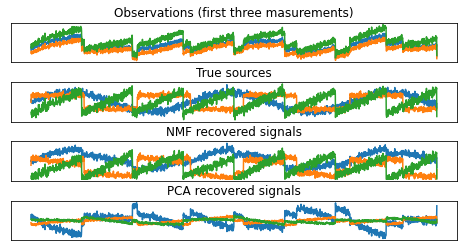

In [5]:
# Vizualising the interpretation of NMF and PCA
import matplotlib.pyplot as plt

models = [X, S, S_, H]
names = ['Observations (first three masurements)', 'True sources', 'NMF recovered signals', 'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

### Manifold Learning with t-SNE

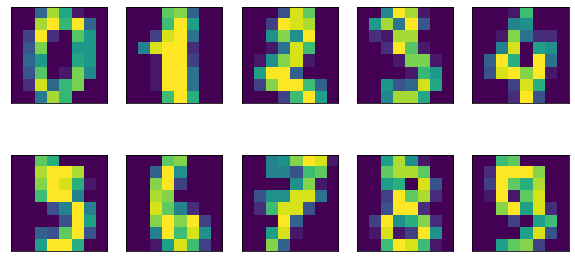

In [1]:
# importing the dataset

from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

In [2]:
# applying TSNE

from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't_SNE feature 1')

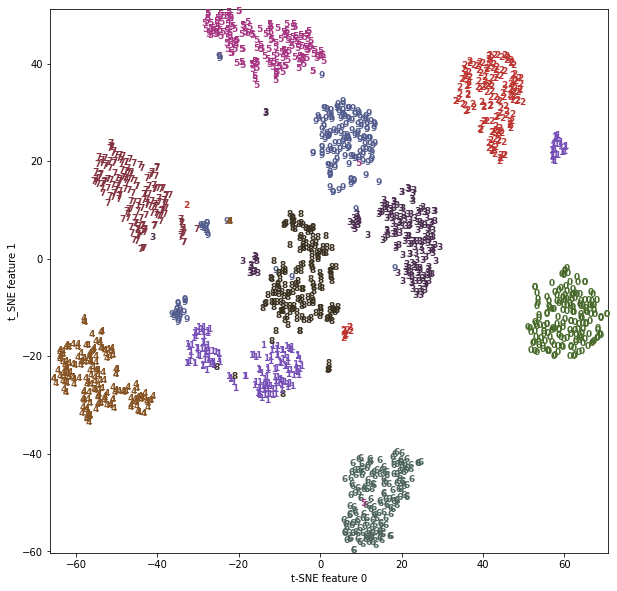

In [5]:
# visualizing

plt.figure(figsize = (10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel('t-SNE feature 0')
plt.ylabel('t_SNE feature 1')

# Clustering
### k-Means Clustering

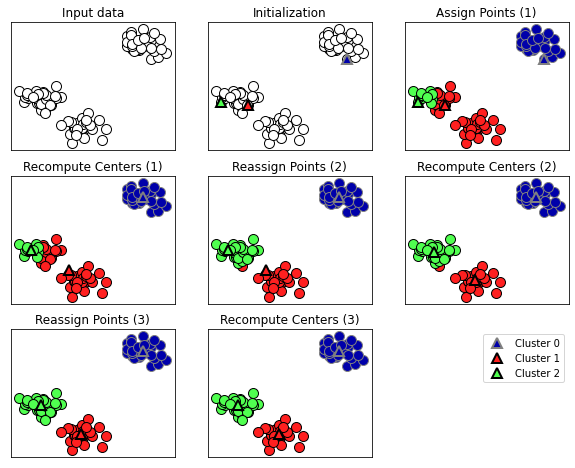

In [1]:
# representation of how k-Means clustering works

import mglearn
mglearn.plots.plot_kmeans_algorithm()

In [2]:
# importing dataset

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

In [3]:
# applying k-means clustering

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [4]:
# checking the result of the clustering (numerically)

kmeans.labels_
# kmeans.predict(X)

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int32)

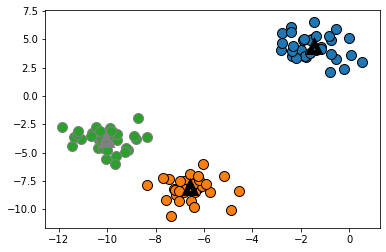

In [9]:
# visualizing the result of clustering

mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0,1,2],
                         markers='^', markeredgewidth=5);

### Agglomerative Clustering

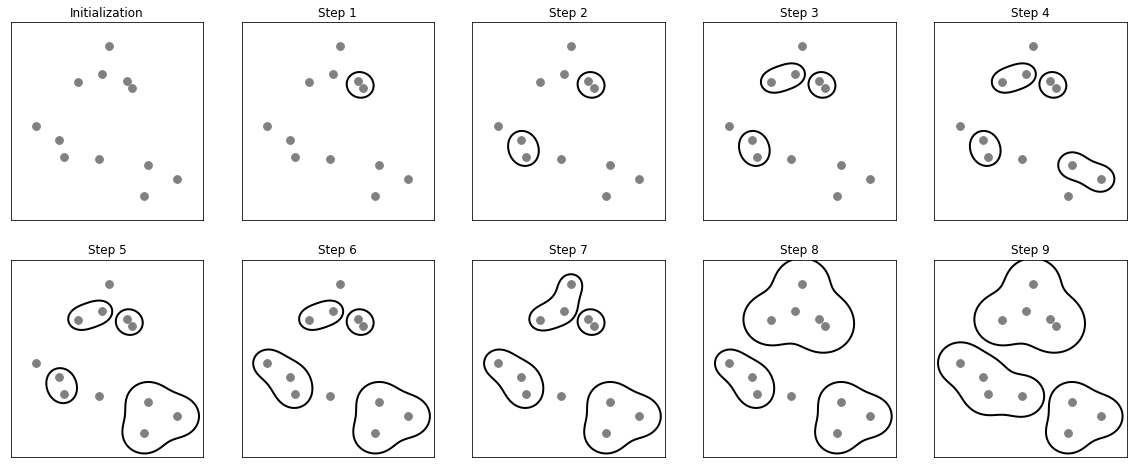

In [1]:
# representation of how agglomerative clustering works

import mglearn
mglearn.plots.plot_agglomerative_algorithm()

In [26]:
# importing dataset

from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

In [27]:
# applying clustering

from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
final = agg.fit_predict(X)

Text(0, 0.5, 'Feature 1')

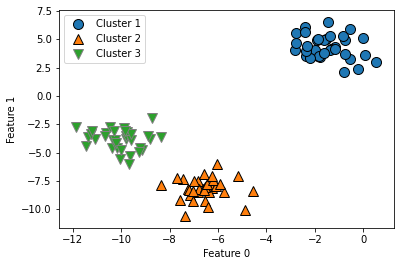

In [29]:
# Visualizing Prediction

import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:, 0], X[:, 1], final)
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')